In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\bryan\Desktop\PCA.csv") #dataset courtest of https://www.kaggle.com/

In [3]:
""""I will utilize a historical dataset that contains information about errors 
experienced by various PCs. Using Logisitc Regression, XGBoost, and Random Forest, I aim to identify the root 
causes of these PC issues. The insights gained from this analysis can then be 
applied to new, unknown data."""

'"I will be using this dataset as a way to demostrate Root Cause Analysis. \nI will feed historical data about errors various PCs experienced into various algorithms\nas a way to determine the root cause of the PCs issue, which we can then generalize to new, uknown data.'

In [4]:
df.head()

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY
1,2,0,0,0,0,0,0,1,MEMORY
2,3,0,1,1,0,0,1,1,MEMORY
3,4,0,1,0,1,1,0,1,MEMORY
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [5]:
df.dtypes 

ID              int64
CPU_LOAD        int64
MEMORY_LOAD     int64
DELAY           int64
ERROR_1000      int64
ERROR_1001      int64
ERROR_1002      int64
ERROR_1003      int64
ROOT_CAUSE     object
dtype: object

In [6]:
df.describe()

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.472000,0.418000,0.394000,0.395000,0.485000,0.432000,0.381000
std,288.819436,0.499465,0.493477,0.488879,0.489095,0.500025,0.495602,0.485876
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,750.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


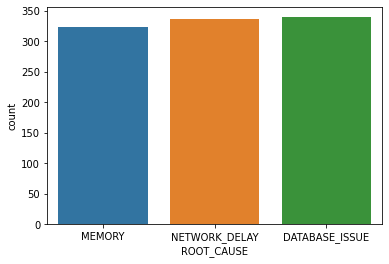

In [7]:
sns.countplot(x="ROOT_CAUSE", data=df)
plt.show()

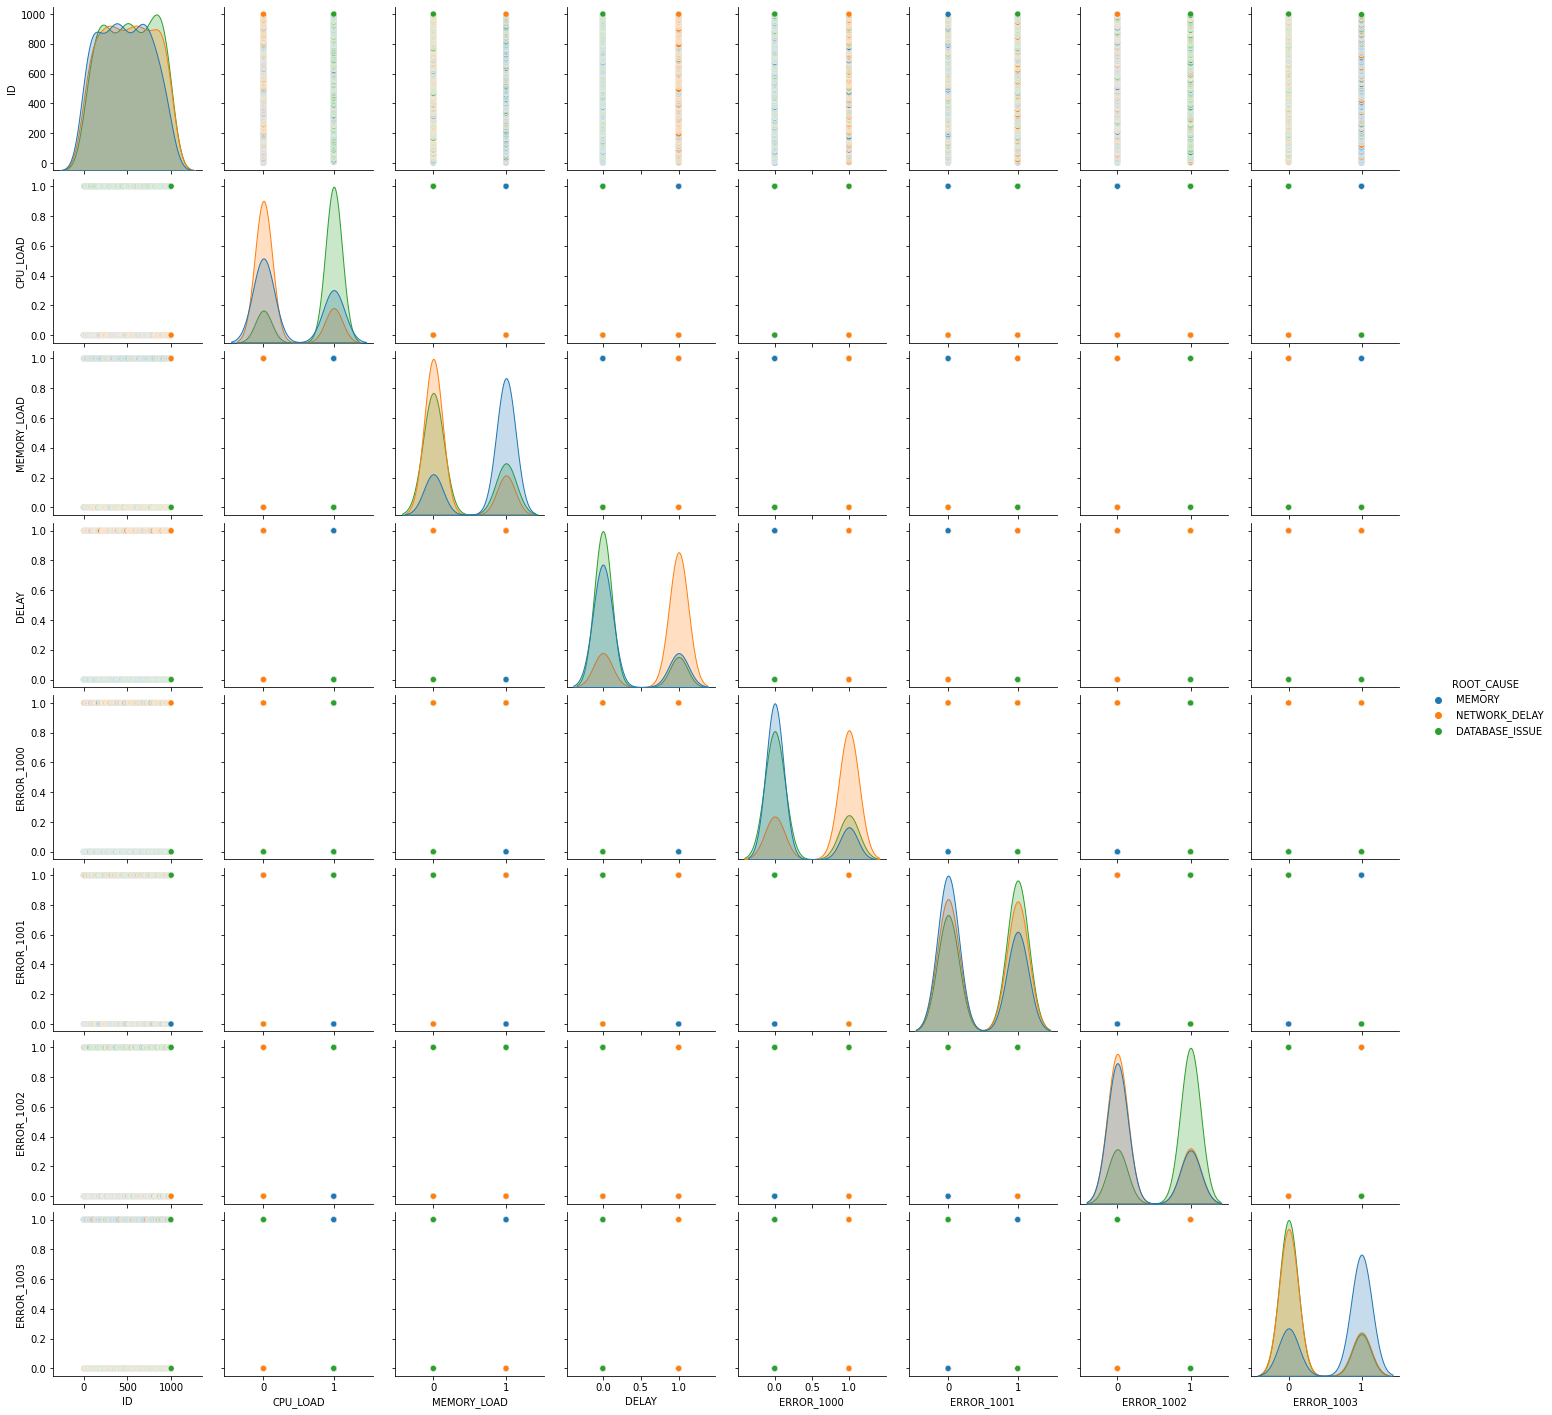

In [8]:
sns.pairplot(df, hue='ROOT_CAUSE')

In [9]:
df.isnull().sum()

ID             0
CPU_LOAD       0
MEMORY_LOAD    0
DELAY          0
ERROR_1000     0
ERROR_1001     0
ERROR_1002     0
ERROR_1003     0
ROOT_CAUSE     0
dtype: int64

In [10]:
#Since there are only 3 possible root causes, I will use "replace" instead of a column transformer

df.ROOT_CAUSE.replace({'MEMORY': 0, 'NETWORK_DELAY': 1, 'DATABASE_ISSUE': 2}, inplace=True)

In [11]:
#targets are now either 0, 1, or 2

df.head()

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,0
1,2,0,0,0,0,0,0,1,0
2,3,0,1,1,0,0,1,1,0
3,4,0,1,0,1,1,0,1,0
4,5,1,1,0,1,0,1,0,1


In [12]:
df.dtypes

ID             int64
CPU_LOAD       int64
MEMORY_LOAD    int64
DELAY          int64
ERROR_1000     int64
ERROR_1001     int64
ERROR_1002     int64
ERROR_1003     int64
ROOT_CAUSE     int64
dtype: object

In [13]:
df = df.drop('ID', axis=1)

In [14]:
X = df.drop(['ROOT_CAUSE'], axis = 1)
y = df.ROOT_CAUSE.values

In [15]:
X

,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003
0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,1
2,0,1,1,0,0,1,1
3,0,1,0,1,1,0,1
4,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,1
996,0,0,0,1,0,0,0
997,1,1,1,0,0,0,0
998,0,1,1,1,1,0,0


In [16]:
X.dtypes

CPU_LOAD       int64
MEMORY_LOAD    int64
DELAY          int64
ERROR_1000     int64
ERROR_1001     int64
ERROR_1002     int64
ERROR_1003     int64
dtype: object

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [66]:
len(X_test)

300

In [67]:
len(y_test)

300

# Logistic Regression

In [69]:
model_1 =  LogisticRegression(penalty = 'none')

model_1.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [73]:
pred_1 = model_1.predict(X_train)

In [72]:
model_1.score(X_test, y_test)

0.8166666666666667

# XGBoost

In [75]:
model_2 = xgb.XGBClassifier()

In [76]:
model_2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [77]:
pred = model_2.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8366666666666667

In [79]:
new_data = [[1,0,0,0,0,1,0]]
new_data = pd.DataFrame(data=new_data, columns = ['CPU_LOAD','MEMORY_LOAD','DELAY', 'ERROR_1000',
                                                 'ERROR_1001','ERROR_1002','ERROR_1003'])

In [80]:
model_2.predict(new_data)

array([2], dtype=int64)

# Random Forest

In [24]:
model_3 = RandomForestClassifier(n_estimators=10,
                            max_features='auto',
                            random_state=101)

In [25]:
#Gridsearch to find best parameters for accuracy

n_estimators = [64, 100, 128,200]
max_features = [2,3,4]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'oob_score':oob_score}

In [26]:
grid = GridSearchCV(model_3,param_grid)

In [27]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10,
                                              random_state=101),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [28]:
grid.best_params_

{'max_features': 3, 'n_estimators': 200, 'oob_score': True}

In [29]:
preds = grid.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [31]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77        94
           1       0.88      0.92      0.90       102
           2       0.80      0.86      0.83       104

    accuracy                           0.84       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.84      0.83       300



In [48]:
test2 = [[1,0,0,0,0,1,0]]

In [49]:
grid.predict(test2)

array([2], dtype=int64)

# Tableau Visualization

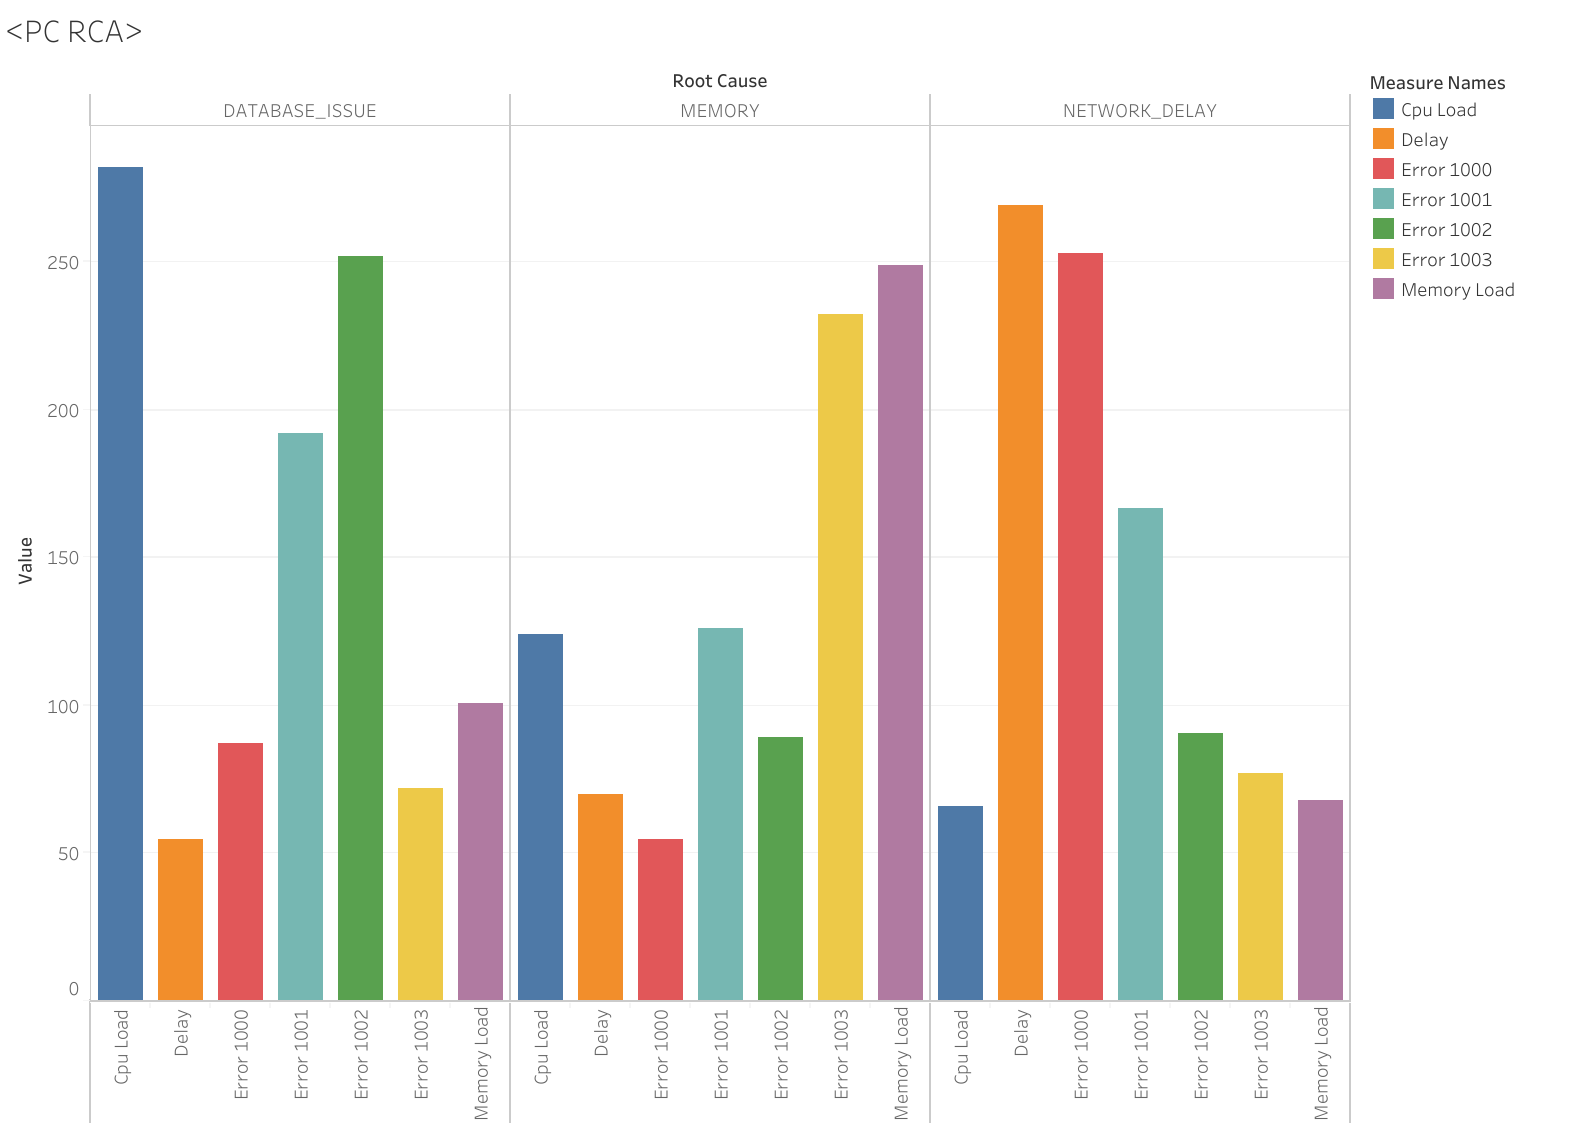